# COVID-19 Italy

Data from https://github.com/pcm-dpc/COVID-19 (Protezione civile)

(repo should be cloned in directory `./protezione-civile` for the following to work)

Sections:
* **Italy**
 * [Confirmed number of COVID-19 cases](#it_conf_cases)
 * [Confirmed number of deceased for COVID-19](#it_num_deceased)
* **Rome province**
 * [ Confirmed number of COVID-19 cases](#rome_prov_cases)

In [1]:
import pandas as pd
import numpy as np
from scipy.optimize import least_squares
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
# To get the daily increments
def get_increments(df_in, column):
    prev = df_in[column][0]
    df_out = np.array([prev])
    for val in df_in[column][1:]:
        df_out = np.append(df_out, [val - prev])
        prev = val
    return df_out

## Italy - Confirmed number of COVID-19 cases <a id='it_conf_cases'></a>

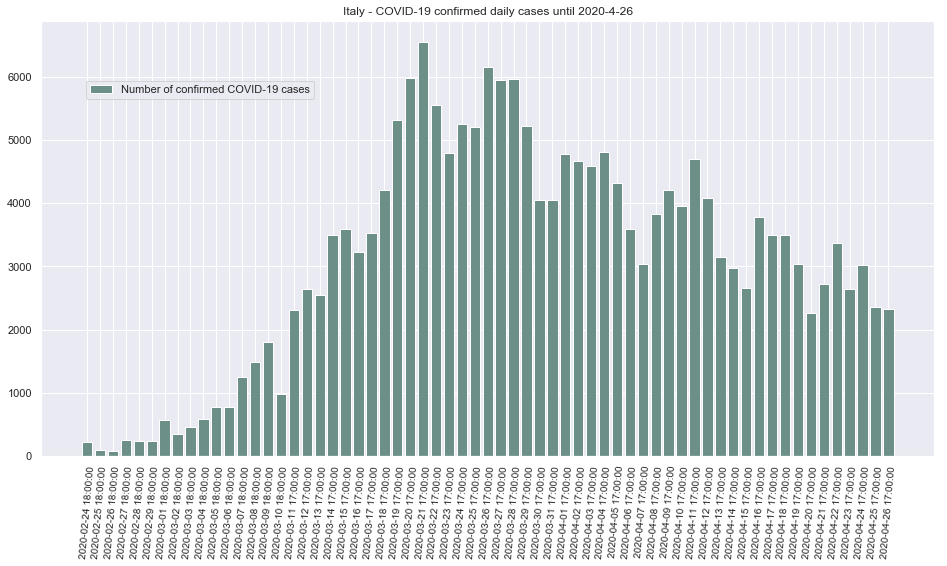

In [3]:
df_it = pd.read_csv("protezione-civile/COVID-19/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv", index_col=0)

df_it.index = pd.to_datetime(df_it.index)
x_data = np.arange(len(df_it))
cases_last_date =  str(df_it.index[-1].year) + "-" + str(df_it.index[-1].month) + "-" + str(df_it.index[-1].day)

df_it_daily = get_increments(df_it, 'totale_casi')

fig = plt.figure(figsize=(16, 8))
splt = fig.add_subplot(111)

splt.bar(x_data, df_it_daily, color = '#6C9088', label = f"Number of confirmed COVID-19 cases")

plt.xticks(ticks = x_data, labels = df_it.index, rotation = 85, size = 10)
plt.title(f"Italy - COVID-19 confirmed daily cases until {cases_last_date}", size=12)
plt.legend(loc = (0.05, 0.82))

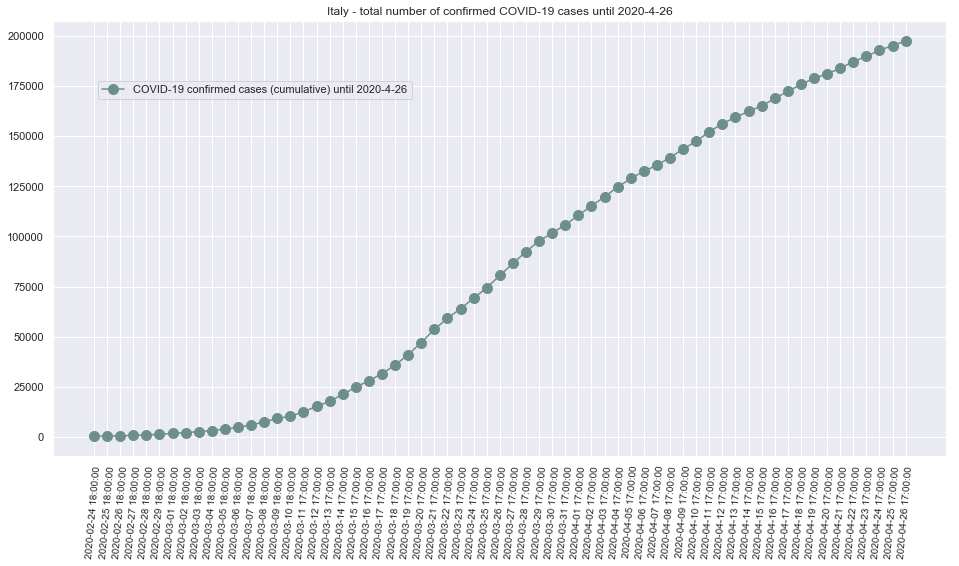

In [4]:
fig = plt.figure(figsize=(16, 8))
splt = fig.add_subplot(111)

splt.plot(x_data, df_it['totale_casi'], '-o',
           markersize=10, color = '#6C9088',
           label = f"COVID-19 confirmed cases (cumulative) until {cases_last_date}")

plt.xticks(ticks=x_data, labels=df_it.index, rotation=85, size = 10)
plt.title(f"Italy - total number of confirmed COVID-19 cases until {cases_last_date}", size=12)
plt.legend(loc = (0.05, 0.82))

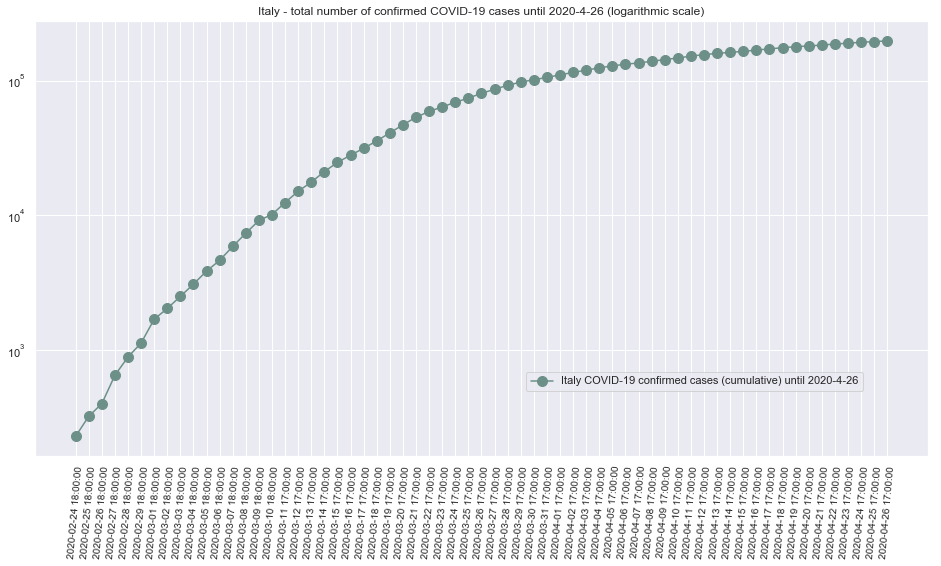

In [5]:
fig = plt.figure(figsize=(16, 8))
splt = fig.add_subplot(111)

splt.plot(x_data, df_it['totale_casi'], '-o',
          markersize = 10, color = '#6C9088',
          label = f"Italy COVID-19 confirmed cases (cumulative) until {cases_last_date}")

splt.set(yscale="log")
plt.xticks(ticks=x_data, labels=df_it.index, rotation=85, size = 10)
plt.title(f"Italy - total number of confirmed COVID-19 cases until {cases_last_date} (logarithmic scale)", size=12)
plt.legend(loc = (0.55, 0.15))

## Italy - Confirmed number of deceased for COVID-19 <a id='it_num_deceased'></a>

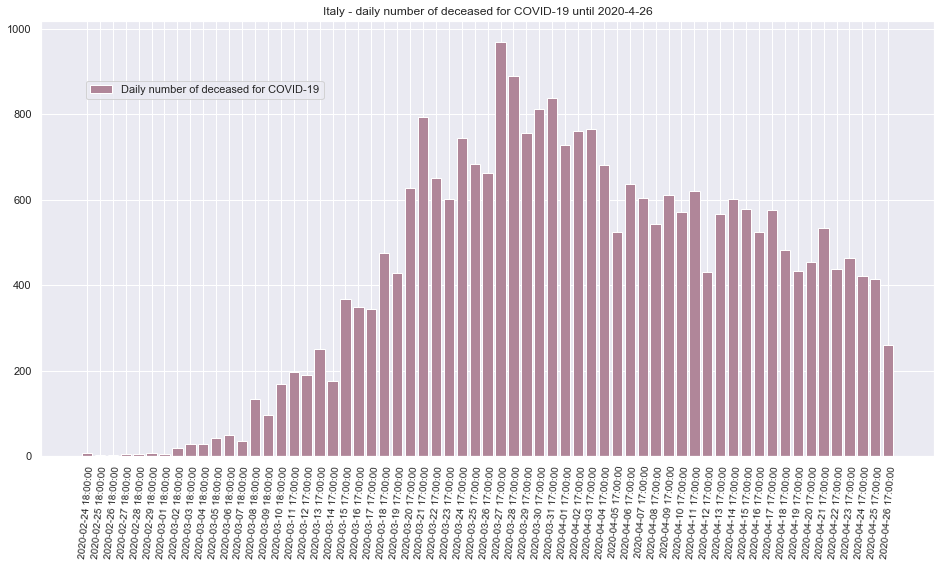

In [6]:
df_it_dec_daily = get_increments(df_it, 'deceduti')

fig = plt.figure(figsize=(16, 8))
splt = fig.add_subplot(111)

splt.bar(x_data, df_it_dec_daily, color = '#B08699', label = f"Daily number of deceased for COVID-19")

plt.xticks(ticks = x_data, labels = df_it.index, rotation = 85, size = 10)
plt.title(f"Italy - daily number of deceased for COVID-19 until {cases_last_date}", size=12)
plt.legend(loc = (0.05, 0.82))

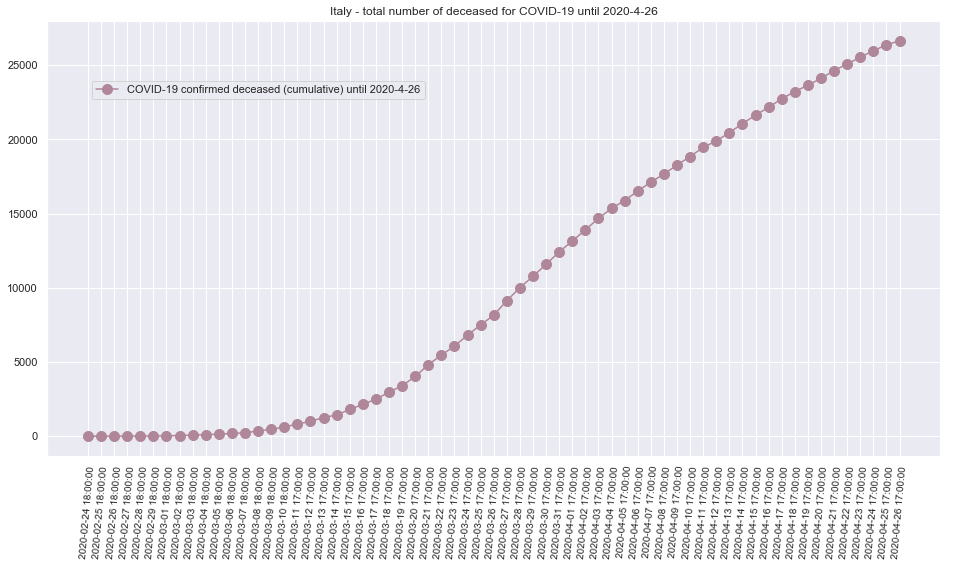

In [7]:
fig = plt.figure(figsize=(16, 8))
splt = fig.add_subplot(111)

splt.plot(x_data, df_it['deceduti'], '-o',
           markersize=10, color = '#B08699',
           label = f"COVID-19 confirmed deceased (cumulative) until {cases_last_date}")

plt.xticks(ticks=x_data, labels=df_it.index, rotation=85, size = 10)
plt.title(f"Italy - total number of deceased for COVID-19 until {cases_last_date}", size=12)
plt.legend(loc = (0.05, 0.82))

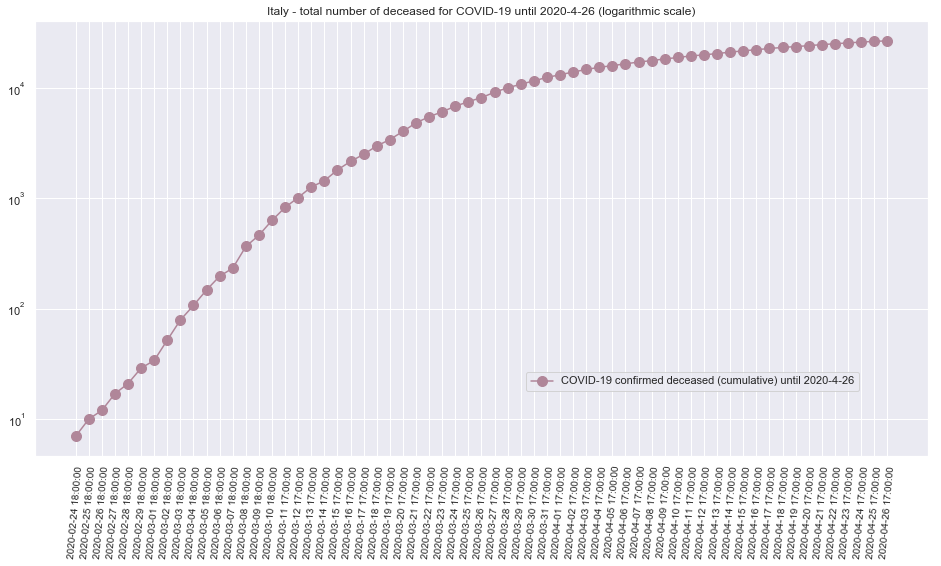

In [8]:
fig = plt.figure(figsize=(16, 8))
splt = fig.add_subplot(111)

splt.plot(x_data, df_it['deceduti'], '-o',
          markersize = 10, color = '#B08699',
          label = f"COVID-19 confirmed deceased (cumulative) until {cases_last_date}")

splt.set(yscale="log")
plt.xticks(ticks=x_data, labels=df_it.index, rotation=85, size = 10)
plt.title(f"Italy - total number of deceased for COVID-19 until {cases_last_date} (logarithmic scale)", size=12)
plt.legend(loc = (0.55, 0.15))

## Rome province - Confirmed number of COVID-19 cases<a id='rome_prov_cases'></a>

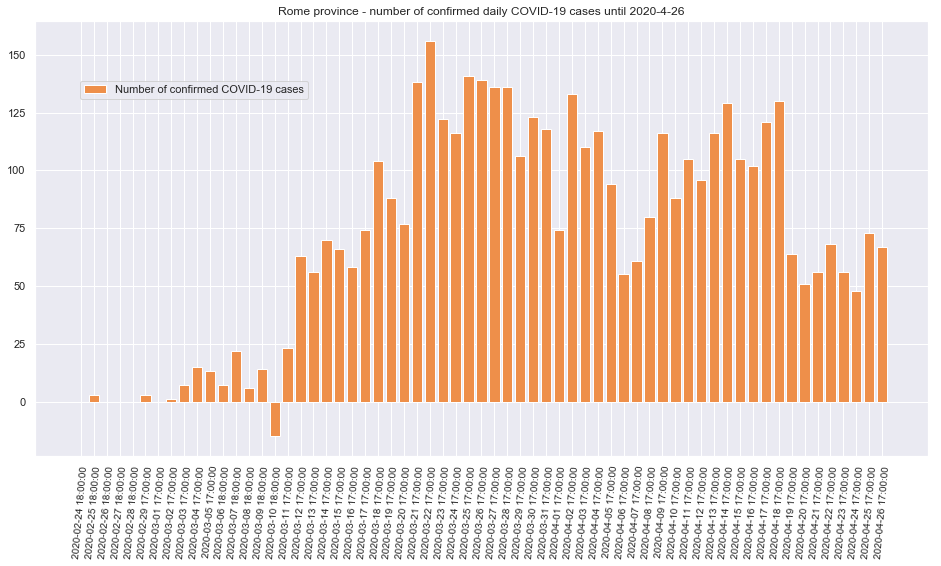

In [9]:
df_rp = pd.read_csv("protezione-civile/COVID-19/dati-province/dpc-covid19-ita-province.csv", index_col=0)
df_rp = df_rp[df_rp['denominazione_provincia']=='Roma']

df_rp.index = pd.to_datetime(df_rp.index)
x_data = np.arange(len(df_rp))
cases_last_date =  str(df_rp.index[-1].year) + "-" + str(df_rp.index[-1].month) + "-" + str(df_rp.index[-1].day)

# Get the daily increments from the cumulative data
df_rp_daily = get_increments(df_rp, 'totale_casi')

fig = plt.figure(figsize=(16, 8))
splt = fig.add_subplot(111)

splt.bar(x_data, df_rp_daily, color = '#EE8F4A', label = f"Number of confirmed COVID-19 cases")

plt.xticks(ticks = x_data, labels = df_rp.index, rotation = 85, size = 10)
plt.title(f"Rome province - number of confirmed daily COVID-19 cases until {cases_last_date}", size=12)
plt.legend(loc = (0.05, 0.82))

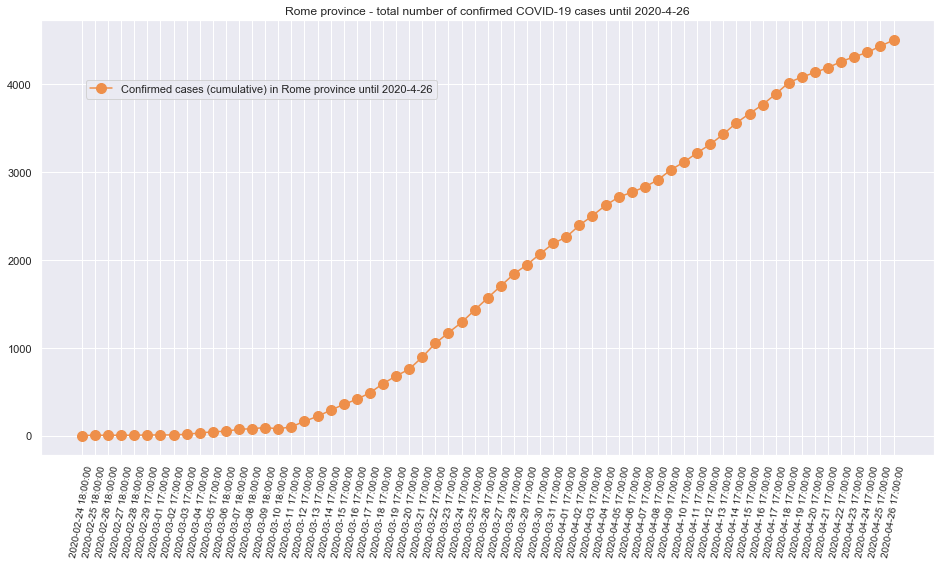

In [10]:
fig = plt.figure(figsize=(16, 8))
splt = fig.add_subplot(111)

splt.plot(x_data, df_rp['totale_casi'], '-o',
          markersize=10, c = '#EE8F4A',
          label = f"Confirmed cases (cumulative) in Rome province until {cases_last_date}")

plt.xticks(ticks=x_data, labels=df_rp.index, rotation=80, size = 10)
plt.title(f"Rome province - total number of confirmed COVID-19 cases until {cases_last_date}", size=12)
plt.legend(loc = (0.05, 0.82))

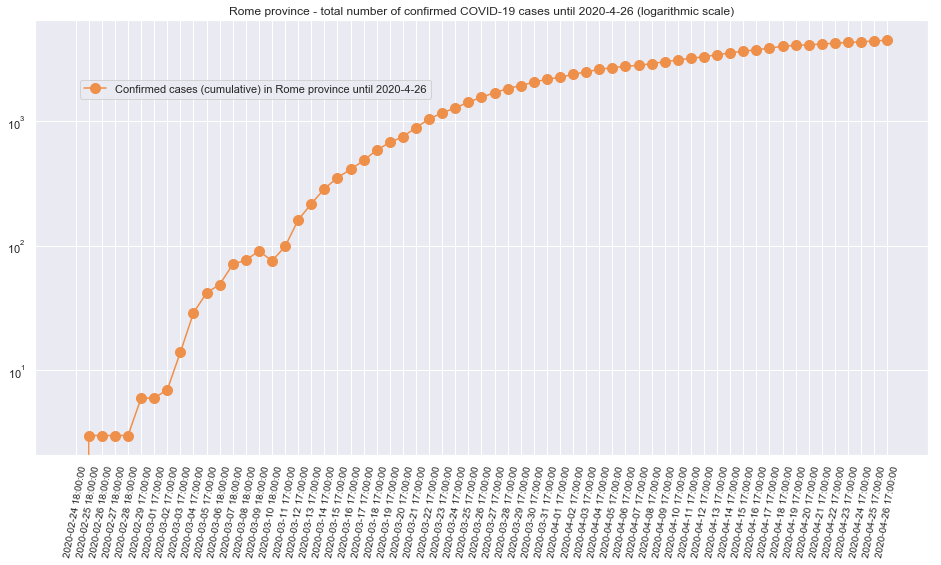

In [11]:
fig = plt.figure(figsize=(16, 8))
splt = fig.add_subplot(111)

splt.plot(x_data, df_rp['totale_casi'], '-o',
          markersize=10, c = '#EE8F4A',
          label = f"Confirmed cases (cumulative) in Rome province until {cases_last_date}")

splt.set(yscale="log")
plt.xticks(ticks=x_data, labels=df_rp.index, rotation=80, size = 10)
plt.title(f"Rome province - total number of confirmed COVID-19 cases until {cases_last_date} (logarithmic scale)",
          size = 12)
plt.legend(loc = (0.05, 0.82))